# Práctica 1 Introducción al Machine Learning. Métricas de clasificación y regresión (II).

# Secuencia de tareas o "pipeline" en ciencia de datos y en machine learning.

En la sesión anterior trabajamos en varias de las tareas del "pipeline" de un proyecto de machine learning. En particular vimos:

<ul>
<li> Cómo visualizar datos, lo que ayuda a analizar su estructura y seleccionar un buen modelo. </li>
<li> Entrenar un modelo y realizar un ajuste fino para seleccionar los mejores hiperparámetros. Para ello utilizamos una serie de métricas. </li>
<li> Comprobamos la capacidad de generalización del modelo.</li>
<li> Evaluamos si era necesario obtener más datos para mejorar el rendimiento del modelo seleccionado.</li>
</ul>

En esta sesión vamos a seguir trabajando en varios de los pasos del proyecto de machine learning.

Aplicaremos las métricas un caso de clasificación con dos características y dos clases y con un modelo más complejo.

Aprenderemos cómo generar conjuntos de entrenamiento y test de forma estratificada.

Veremos cómo realizar una selección más amplia y precisa de los modelos y de los hiperparámetros. 

Al igual que en la sesión anterior, trabajaremos con problemas de clasificación y regresión.

![Flujo de tareas pipeline machine learning.png](<attachment:Flujo de tareas pipeline machine learning.png>)
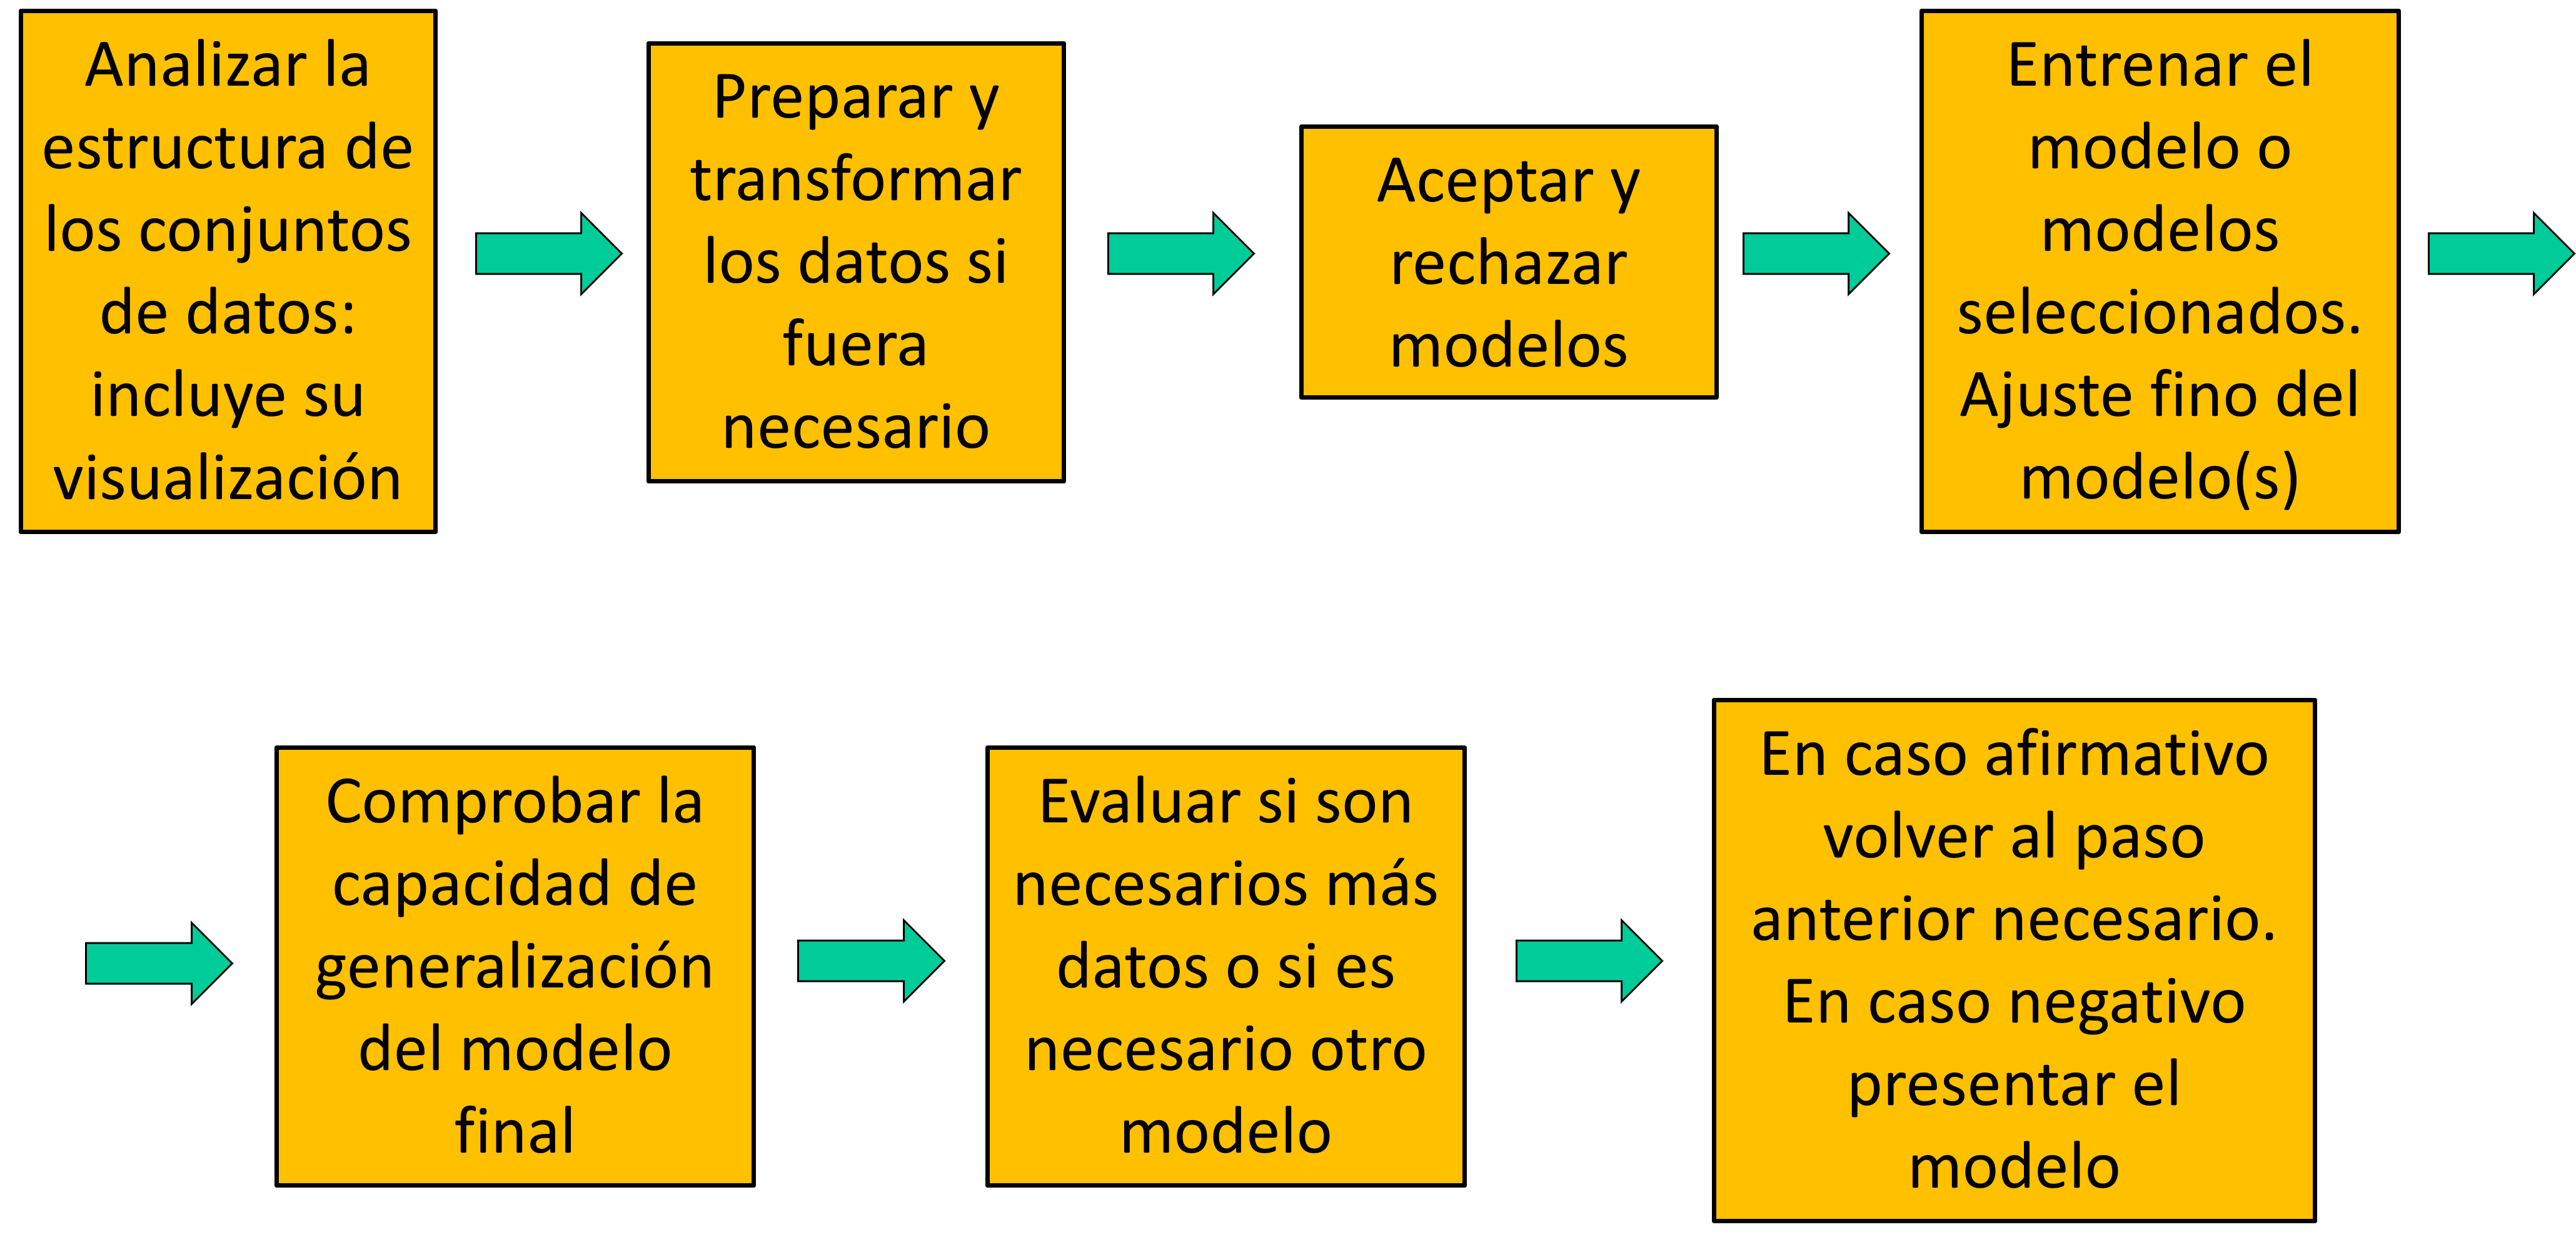

## Importación de bibliotecas. 

Como en la primera sesión, el primer paso consiste en importar las biliotecas auxiliares.  

In [33]:
# Importación de bibliotecas auxiliares
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

## Métricas para clasificación. 



**Caso de clasificación: dos características y dos clases**

En primer lugar vamos a generar mediante *make_classification()* un caso de clasificación con dos características y dos clases. Este ejemplo nos servirá para:

Dibujar la frontera de decisión entre las dos clases.

Seguir trabajando con las métricas.

Trabajar con la generación de conjuntos de entrenamiento y test en un problema de clasificación para comprobar la capacidad de generalización de la técnica.

Generar conjuntos de entrenamiento y de test de forma estratificada.

Comprobar el rendimiento de dos métodos diferentes de clasificación en el mismo conjunto de datos.

Aplicar técnicas para seleccionar el mejor modelo y el mejor conjunto de hiperaparámetros.

En la siguiente celda de código generamos los datos de las dos clases y visualizamos los datos.

[1 0 1 0 0]


Text(0, 0.5, 'Característica x2')

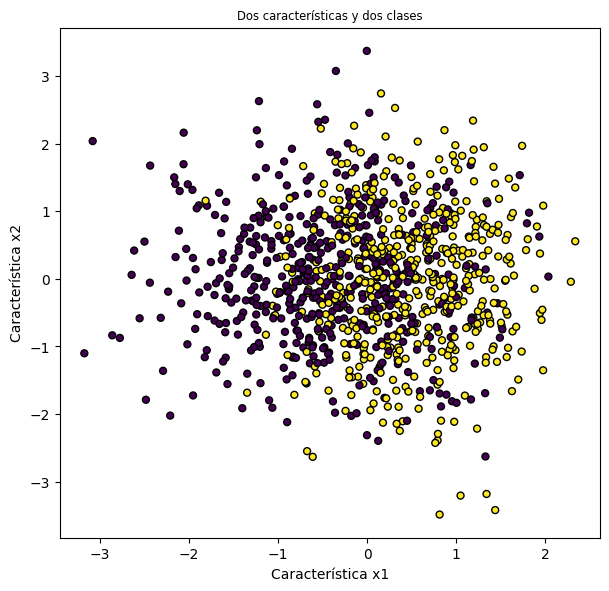

In [34]:
# Importamos la clase necesaria
from sklearn.datasets import make_classification

# Número de puntos
numero_puntos = 1000

# Generamos las dos clases
x, y = make_classification(
    n_samples=numero_puntos, n_features=2, n_redundant=0, n_informative=1, 
    n_classes=2, n_clusters_per_class=1, class_sep=0.50
)

# Características (features)
x1 = x[:,0]
x2 = x[:,1]
# Y son las etiquetas: valores de 0 y 1. 
# De nuevo una clase está definda con un 0 y la otra clase con un 1
print(y[0:5])

plt.figure(figsize=(6, 6))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.title("Dos características y dos clases", fontsize="small")
plt.scatter(x1, x2, marker="o", c=y, s=25, edgecolor="k")
plt.xlabel('Característica x1')
plt.ylabel('Característica x2')

**Frontera de decisión**

En la siguiente celda se muestra el código para generar la frontera de decisión en el problema de clasificación de dos clases con dos características con un clasificador lineal entrenado con el algoritmo SGD.

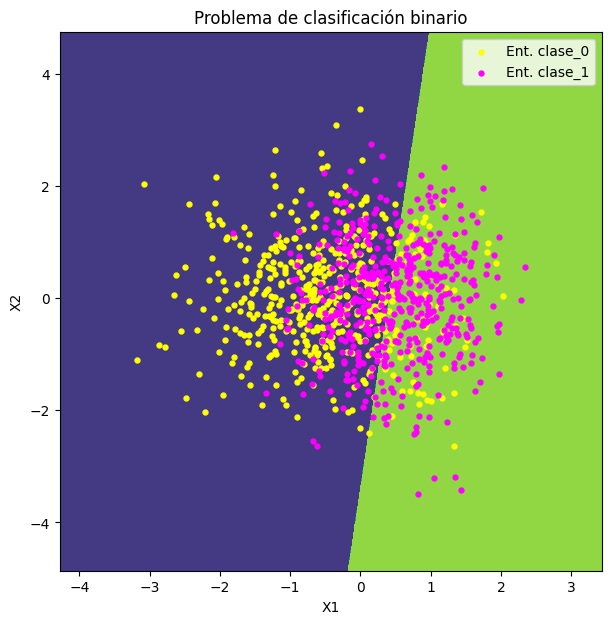

In [35]:
# Importamos la clase de la técnica de clasificación de Machine Learning que vamos a emplear
from sklearn.linear_model import SGDClassifier

# Instanciamos el clasificador lineal entrenado con SGD
clasificador_sgd = SGDClassifier()

# Estimación de los parámetros del modelo para el conjunto de datos
clasificador_sgd.fit(x, y)

# Predicción de los valores. y_sal son los valores de salida del clasificador
# La salida del clasificador produce valores de 0 o de 1
y_sal = clasificador_sgd.predict(x)


# Frontera de decisión: definimos una función para reutilizar el código
def dibuja_frontera_decision(Entradas, modelo, Salidas, clase_0, clase_1, 
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo, tamano_simbolo, adicion_frontera):
    '''Dibuja las clases y la frontera de decisión generada por la 
    técnica de machine learning'''

    if (adicion_frontera == 1):
        minX = min(Entradas[:, 0])       # Valor mínimo de la 1ª característica
        maxX = max(Entradas[:, 0])       # Valor máximo de la 1ª característica
        minY = min(Entradas[:, 1])       # Valor mínimo de la 2ª característica
        maxY = max(Entradas[:, 1])       # Valor máximo de la 2ª característica
        marginX = (maxX - minX) * 0.2  # 20% del rango
        marginY = (maxY - minY) * 0.2  # para las dos características
        x = np.linspace(minX - marginX, maxX + marginX, 1000)  # Vector de coord. X
        y = np.linspace(minY - marginY, maxY + marginY, 1000)  # Vector de coord. Y
        X, Y = np.meshgrid(x, y)       # Generamos las matrices de coordenadas

        # Concatenación con np.c_
        Z = modelo.predict(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)

        
        plt.contourf(X, Y, Z,levels = 2)

    condicion = Salidas == clase_0
    entradas_clase_0 = Entradas[condicion]
    x1 = entradas_clase_0[:,0]
    y1 = entradas_clase_0[:,1]
    color_cero = colores[0] 
    plt.scatter(x1, y1, marker=simbolo, s=tamano_simbolo, color=color_cero, label=etiqueta_leyenda_cero)

    condicion = Salidas == clase_1
    entradas_clase_1 = Entradas[condicion]
    x1 = entradas_clase_1[:,0]
    y1 = entradas_clase_1[:,1]
    color_uno = colores[1]
    plt.scatter(x1, y1, marker=simbolo, s=tamano_simbolo, color=color_uno, label=etiqueta_leyenda_uno)

    plt.title(titulo)
    plt.xlabel(titulo_eje_x)
    plt.ylabel(titulo_eje_y)
    plt.legend()

# Figura
fig, ax = plt.subplots(figsize = (7, 7))
# Valores de los parámetros de entrada
clase_0 = 0
clase_1 = 1
colores = ["yellow", "magenta"]
etiqueta_leyenda_cero = 'Ent. clase_0'
etiqueta_leyenda_uno = 'Ent. clase_1'
titulo = "Problema de clasificación binario"
titulo_eje_x = "X1"
titulo_eje_y = "X2"
simbolo = '.'
tamano_simbolo = 50
adicion_frontera = 1
dibuja_frontera_decision(x, clasificador_sgd, y, clase_0, clase_1,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo, tamano_simbolo, adicion_frontera)



<font color="FF0000">**Ejercicio 1: frontera de decision**</font>

<font color="007AFF"> ¿Qué forma tiene la frontera de decisión? ¿Por qué tiene esa forma? 

¿Existen casos de datos de entrada mal clasificados? Cite uno de cada clase e indique por qué están mal clasificados. </font>

La frontera de decisión será una línea recta, ya que el clasificador es lineal. Los datos mal clasificados son aquellos que están en la región de influencia de la otra clase. Por ejemplo, el punto (0.5, 0.5) está mal clasificado, ya que está en la región de influencia de la clase 1. Por otro lado, el punto (-0.5, -0.5) también está mal clasificado, ya que está en la región de influencia de la clase 0.

<font color="red"> **Ejercicio 2: valores de las métricas para el caso de dos características** </font>

<font color="007AFF">Escriba el código para obtener el acierto del clasificador entrenado y el resto de métricas: exactitud, precisión y sensibilidad. Reutilice el código de la sesión anterior.</font>

**Ejercicio 3: gráfica de precisión vs. sensibilidad y curva ROC**

Obtenga la gráfica de precisión vs. sensibilidad y la curva ROC, obtenga también el valor de AUC.

¿A la vista de los resultados, se puede calificar como un buen clasificador?

**Nueva técnica de machine learning**

A continuación aplicaremos una nueva técnica de machine learning para ver si conseguimos un rendimiento mejor. La técnica es la de "Random Forest":  esta técnica hace uso de un conjunto de árboles de decisión, que son construidos con un cierto grado de aleatoriedad, y decide la salida según el conjunto total de árboles de decisión construidos. No vamos a explicar esta técnica, simplemente tenemos que saber que es una técnica más compleja que el clasificador lineal empleado anteriormente.

La técnica de "Random Forest" no calcula un valor real para cada etiqueta tal como hacía el clasificador lineal, sino que estima la probabilidad de pertenencia a cada clase. Es decir, si existen dos posibles clases, dado un ejemplo o dato de entrada, el clasificador de Random Forest" estima la probabilidad de pertenencia de la clase 0 y la clase 1 y en base a las probabilidades da un valor de 0 o 1 a la salida. 

Para emplear esta técnica en tareas de clasificación hay que importar la clase *RandomForestClassifier()*, que, como todo estimador, posee los métodos *fit()* y *predict()*. En la siguiente celda de código se estiman los parámetros y se realiza la predicción. En lugar del método *decision_function()* posee el método *predict_proba()* que permite obtener las probabilidades de pertenencia.

In [36]:
# Importamos la clase RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instanciamos la clase
clasificador_random_forest = RandomForestClassifier()

# Estimamos los parámetros 
clasificador_random_forest.fit(x, y)

# Predicción y probabilidades en cada ejemplo
y_sal = clasificador_random_forest.predict(x)
y_sal_probabilidades = clasificador_random_forest.predict_proba(x)

# Vemos algunos datos por pantalla
print('Etiquetas')
print(y[:10])
print('Salidas del clasificador')
print(y_sal[:10])
print('Probabilidades de cada clase')
print(y_sal_probabilidades[:10])

Etiquetas
[1 0 1 0 0 1 0 1 0 1]
Salidas del clasificador
[1 0 1 0 0 1 0 1 0 1]
Probabilidades de cada clase
[[0.04 0.96]
 [0.87 0.13]
 [0.24 0.76]
 [0.86 0.14]
 [1.   0.  ]
 [0.23 0.77]
 [0.67 0.33]
 [0.13 0.87]
 [1.   0.  ]
 [0.21 0.79]]


**Ejercicio 4: frontera de decisión para el clasificador Random Forest**

Obtenga la frontera de decisión para el nuevo clasificador. ¿Qué diferencia principal existe entre la frontera de decisión del clasificador lineal y esta nueva frontera?

Nota: si la obtención de la frontera tarda mucho tiempo, puede reducir el número de puntos de la rejilla de puntos de la función *dibuja_frontera_decision()*, por ejemplo, en lugar de 1000, utilizar 500.

**Ejercicio 5: valores de las métricas para el caso de dos características y el clasificador Radom Forest**

Escriba el código para obtener el acierto del clasificador entrenado y el resto de métricas: exactitud, precisión y sensibilidad.

**Ejercicio 6: gráfica de precisión vs. sensibilidad y curva ROC para el clasificador Radom Forest**

Obtenga la gráfica de precisión vs. sensibilidad y la curva ROC, obtenga también el valor de AUC.

Como el clasificador "Random Forest" no ofrece valores reales en las etiquetas, vamos a emplear como valores reales (y_puntuaciones) los valores de probabilidad de las etiquetas igual a 1. Por lo tanto:

y_puntuaciones = y_sal_probabilidades[:, 1]

¿A la vista de los resultados, se puede calificar como un buen clasificador?

¿Es mejor que el clasificador lineal?

**Conjuntos de entrenamiento y test**

Tal como estudiamos en el ejemplo de regresión, para evaluar la capacidad de generalización del modelo es necesario emplear un conjunto de datos nunca visto por el modelo en su entrenamiento. Vamos a generar un conjunto de entrenamiento y test para el problema de clasificación mediante la función *train_test_split()*


**Ejercicio 7: generación de conjuntos de entrenamiento y test**

Genere conjuntos de entrenamiento y test en el problema de clasificación en una proporción 80%-20%.

**Frontera de decisión con datos de entrenamiento y test para el clasificador lineal**

En primer lugar, vamos a visualizar la frontera de decisión y los datos de entrenamiento y test para el clasificador lineal. Primero se dibujan los datos de entrenamiento añadiendo la frontera de decisión para todo el espacio y a continuación se dibujan los datos de test sin añadir la frontera de decisión, ya que está dibujada anteriormente.

**Ejercicio 8: métricas para el clasificador lineal en el conjunto de entrenamiento y test. Curva ROC y valor de AUC para el clasificador lineal en el conjunto de entrenamiento y test**

En este ejercicio obtenga las métricas para el clasificador lineal tanto en el conjunto de entrenamiento como en el de test. Asimismo, obtenga la curva ROC y el valor de AUC para los dos conjuntos.

¿Es un clasificador que generalice adecuadamente?

**Ejercicio 9: frontera de decisión con datos de entrenamiento y test para el clasificador Radom Forest**

En este ejercicio se pide dibujar los conjuntos de entrenamiento y test y la frontera de decisión para el clasificador "Random Forest".

¿Existen ejemplos de test mal clasificados? ¿Cómo cree que afectará este hecho a las métricas y curva ROC del conjunto de test?

**Ejercicio 10: métricas para el clasificador Radom Forest en el conjunto de entrenamiento y test. Curva ROC y valor de AUC para el clasificador Radom Forest en el conjunto de entrenamiento y test**

En este ejercicio obtenga las métricas para el clasificador "Random Forest" tanto en el conjunto de entrenamiento como en el de test. Asimismo, obtenga la curva ROC y el valor de AUC para los dos conjuntos.

¿Es un clasificador que generalice adecuadamente? ¿Se obtiene el mismo rendimiento en el conjunto de entrenamiento y en el de test?

**Generación estratificada de los conjuntos de entrenamiento y de test**

En la generación del conjunto de entrenamiento y test se ha utilizado la función *train_test_split()* que selecciona las muestras de cada conjunto de forma aleatoria. Si el número de muestras no es elevado (especialmente respecto al número de atributos) una selección aleatoria puede producir conjuntos de entrenamiento y test que posean una distribución  diferente o no similar a la del conjunto de datos total.

Vamos a ver este problema en el conjunto de entrenamiento. Para ello reduciremos el número de ejemplos totales a 50 y mediante la función *hist()* construiremos el histograma de los datos totales y del conjunto de entrenamiento. El histograma calcula cuántos datos pertenecen a cada uno de los intervalos (*bins*) en los que se divide el rango total de los datos. Por ello, el histograma es una aproximación de la distribución de los datos.

En la siguiente celda de código se aplica el histograma para ver la distribución de los datos totales y de un conjunto de entrenamiento. Como se aprecia en los datos y figuras, la distribución del conjunto de entrenamiento presenta diferencias respecto a la del conjunto total.

Los datos y figura de la característica: 0
[ 2  7 11  9 11  7  3]
[0.04 0.14 0.22 0.18 0.22 0.14 0.06]
[ 2  7 10  6  9  4  2]
[0.05  0.175 0.25  0.15  0.225 0.1   0.05 ]


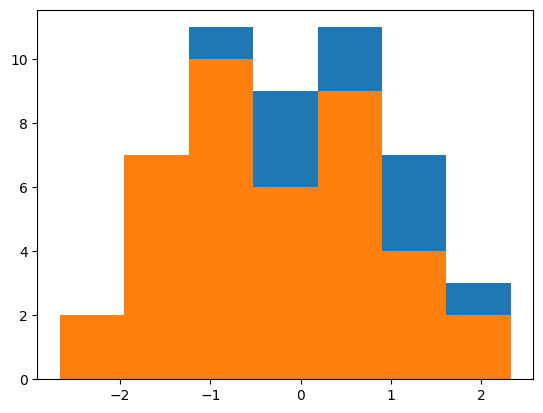

Los datos y figura de la característica: 1
[ 9  7 11  7  6  4  6]
[0.18 0.14 0.22 0.14 0.12 0.08 0.12]
[7 4 7 7 5 4 6]
[0.175 0.1   0.175 0.175 0.125 0.1   0.15 ]


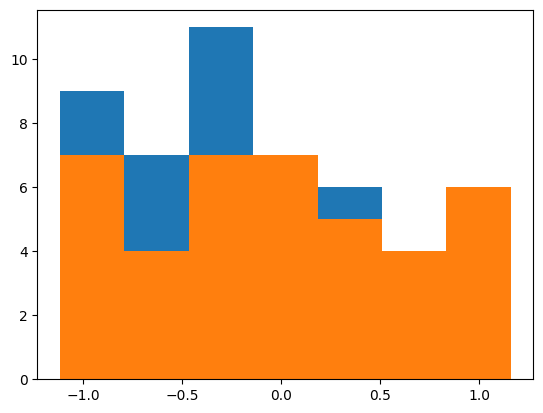

In [ ]:
from sklearn.model_selection import train_test_split

# Número de puntos
numero_puntos = 50

# Generamos las dos clases
x, y = make_classification(
    n_samples=numero_puntos, n_features=2, n_redundant=0, n_informative=1, 
    n_classes=2, n_clusters_per_class=1, class_sep=0.50
)

# Conjuntos de entrenamiento y test
# El conjunto de entrenamiento es un 80% del total
x_ent, x_test, y_ent, y_test  = train_test_split(x, y, test_size=0.2)


# Número de intervalos
bins=7

for indice in [0,1]:
    print(f'Los datos y figura de la característica: {indice}')
    # Histograma del conjunto total
    hist = np.histogram(x[:,indice],bins)
    numero_datos_bins = hist[0]
    # Número de datos en cada intervalo
    print(numero_datos_bins)
    # Frecuencia de los daos en cada intervalo
    print(numero_datos_bins/len(x))

    # Histograma del conjunto de entrenamiento
    hist = np.histogram(x_ent[:,indice],bins)
    numero_datos_bins = hist[0]
    # Número de datos en cada intervalo
    print(numero_datos_bins)
    # Frecuencia de los datos en cada intervalo
    print(numero_datos_bins/len(x_ent))

    # Dibujamos el histograma de la característica
    plt.hist(x[:,indice], bins=bins)
    plt.hist(x_ent[:,indice], bins=bins)
    plt.show()


**Ejercicio 11: muestreo estratificado**

*Scikit-learn* dispone de la clase *StratifiedShuffleSplit()* para realizar un muestreo que respete las distribuciones de los datos en mayor medida que el muestreo aleatorio. Esta clase genera los índices del muestreo estratificado.

En la siguiente celda de código se muestra cómo aplicar esta clase para obtener el muestreo en el conjunto de entrenamiento y de test, aunque sólo vamos a ver los resultados en el conjunto de entrenamiento. Aplique el histograma para obtener la frecuencia y obtenga la figura del histrograma de los datos de entrenamiento en las dos caracteríticas. ¿Se ha conseguido una mejor representación de la distribución original?


In [ ]:
# Importamos la clase para realizar el muestreo estratificado
from sklearn.model_selection import StratifiedShuffleSplit

# Instanciamos la clase: el tamaño del conjunto de entrenamiento es el mismo que en
# el caso de muestreo aleatorio
dividir_forma_estratificada = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=42)

# Mediante este bucle
for train_index, test_index in dividir_forma_estratificada.split(x, y):
    x_ent_estratificada, x_test_estratificada = x[train_index], x[test_index]
    y_ent_estratificada, y_test_estratificada = y[train_index], y[test_index]

################################################################################################


**Evaluación del rendimiento y selección de parámetros mediante validación cruzada**

Otra limitación en la forma en la que hemos empleado *train_test_split()* radica en que sólo generamos un único conjunto de entrenamiento y test, lo que puede dar una falsa impresión sobre el rendimiento de la técnica de machine learning: la técnica podría ser muy precisa para un determinado conjunto de test y ser menos precisa para otro conjunto de test extraído del mismo conjunto total de datos. En las siguientes celdas de código se ha copiado el código para ejecutar la visualización de la frontera de decisión. Ejecute varias veces el código y compruebe que la frontera de decisión cambia, lo que conduce a precisiones diferentes de entrenamiento y test diferentes.


In [ ]:
# EJECUTE ESTA CELDA SÓLO UNA VEZ
# Número de puntos
numero_puntos = 1000

# Generamos las dos clases
x, y = make_classification(
    n_samples=numero_puntos, n_features=2, n_redundant=0, n_informative=1, 
    n_classes=2, n_clusters_per_class=1, class_sep=1.0
)

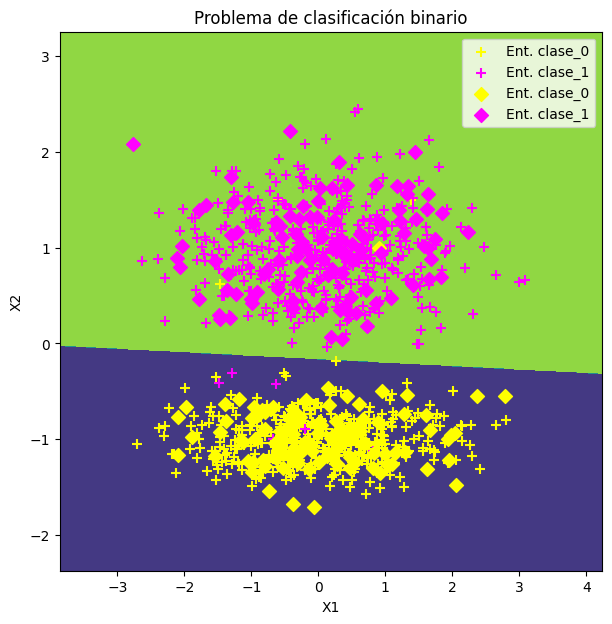

In [ ]:
# EJECUTE ESTA CELDA VARIAS VECES

# Conjuntos de entrenamiento y test
x_ent, x_test, y_ent, y_test  = train_test_split(x, y, test_size=0.2)

# Estimación de los parámetros con el conjunto de entrenamiento
clasificador_sgd.fit(x_ent, y_ent)

# Predicción para el conjunto de entrenamiento y de test
y_sal_ent = clasificador_sgd.predict(x_ent)
y_sal_test = clasificador_sgd.predict(x_test)

# Gráfica de la frontera de decisión 
# Figura
fig, ax = plt.subplots(figsize = (7, 7))
# Valores de los parámetros de entrada
clase_0 = 0
clase_1 = 1
colores = ["yellow", "magenta"]
etiqueta_leyenda_cero = 'Ent. clase_0'
etiqueta_leyenda_uno = 'Ent. clase_1'
titulo = "Problema de clasificación binario"
titulo_eje_x = "X1"
titulo_eje_y = "X2"
simbolo = '+'
tamano_simbolo = 50
adicion_frontera = 1
dibuja_frontera_decision(x_ent, clasificador_sgd, y_ent, clase_0, clase_1,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo, tamano_simbolo, adicion_frontera)

simbolo = 'D'
tamano_simbolo = 50
adicion_frontera = 0
dibuja_frontera_decision(x_test, clasificador_sgd, y_test, clase_0, clase_1,
                            colores, etiqueta_leyenda_cero,
                            etiqueta_leyenda_uno, titulo, titulo_eje_x, titulo_eje_y,
                            simbolo, tamano_simbolo, adicion_frontera)


Como se ha visto en teoría, se puede evaluar el rendimiento del método de machine learning de una forma más completa mediante el empleo de la validación cruzada. Esta técnica es especialmente útil en los casos en los que se dispone de pocas muestras en el conjunto de entrenamiento. En la siguiente figura se muestra el fundamento de esta técnica: el conjunto total de datos se divide en subconjuntos o *folds* y en cada iteración se entrena la técnica con todos los subconjuntos menos uno que se reserva para validación (test). La precisión final es la media de las precisiones alcanzadas en las iteraciones del método de validación cruzada.

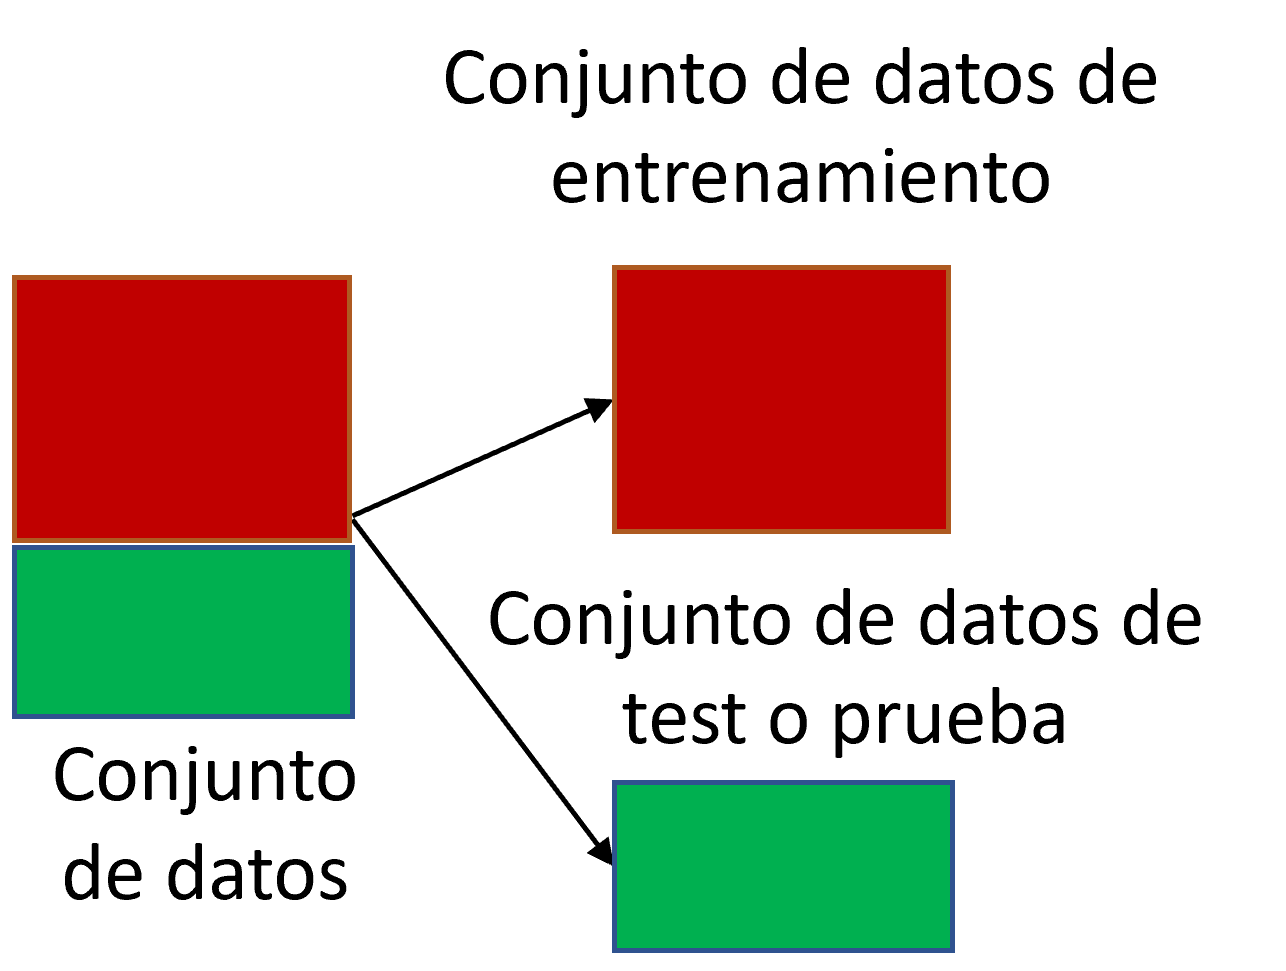


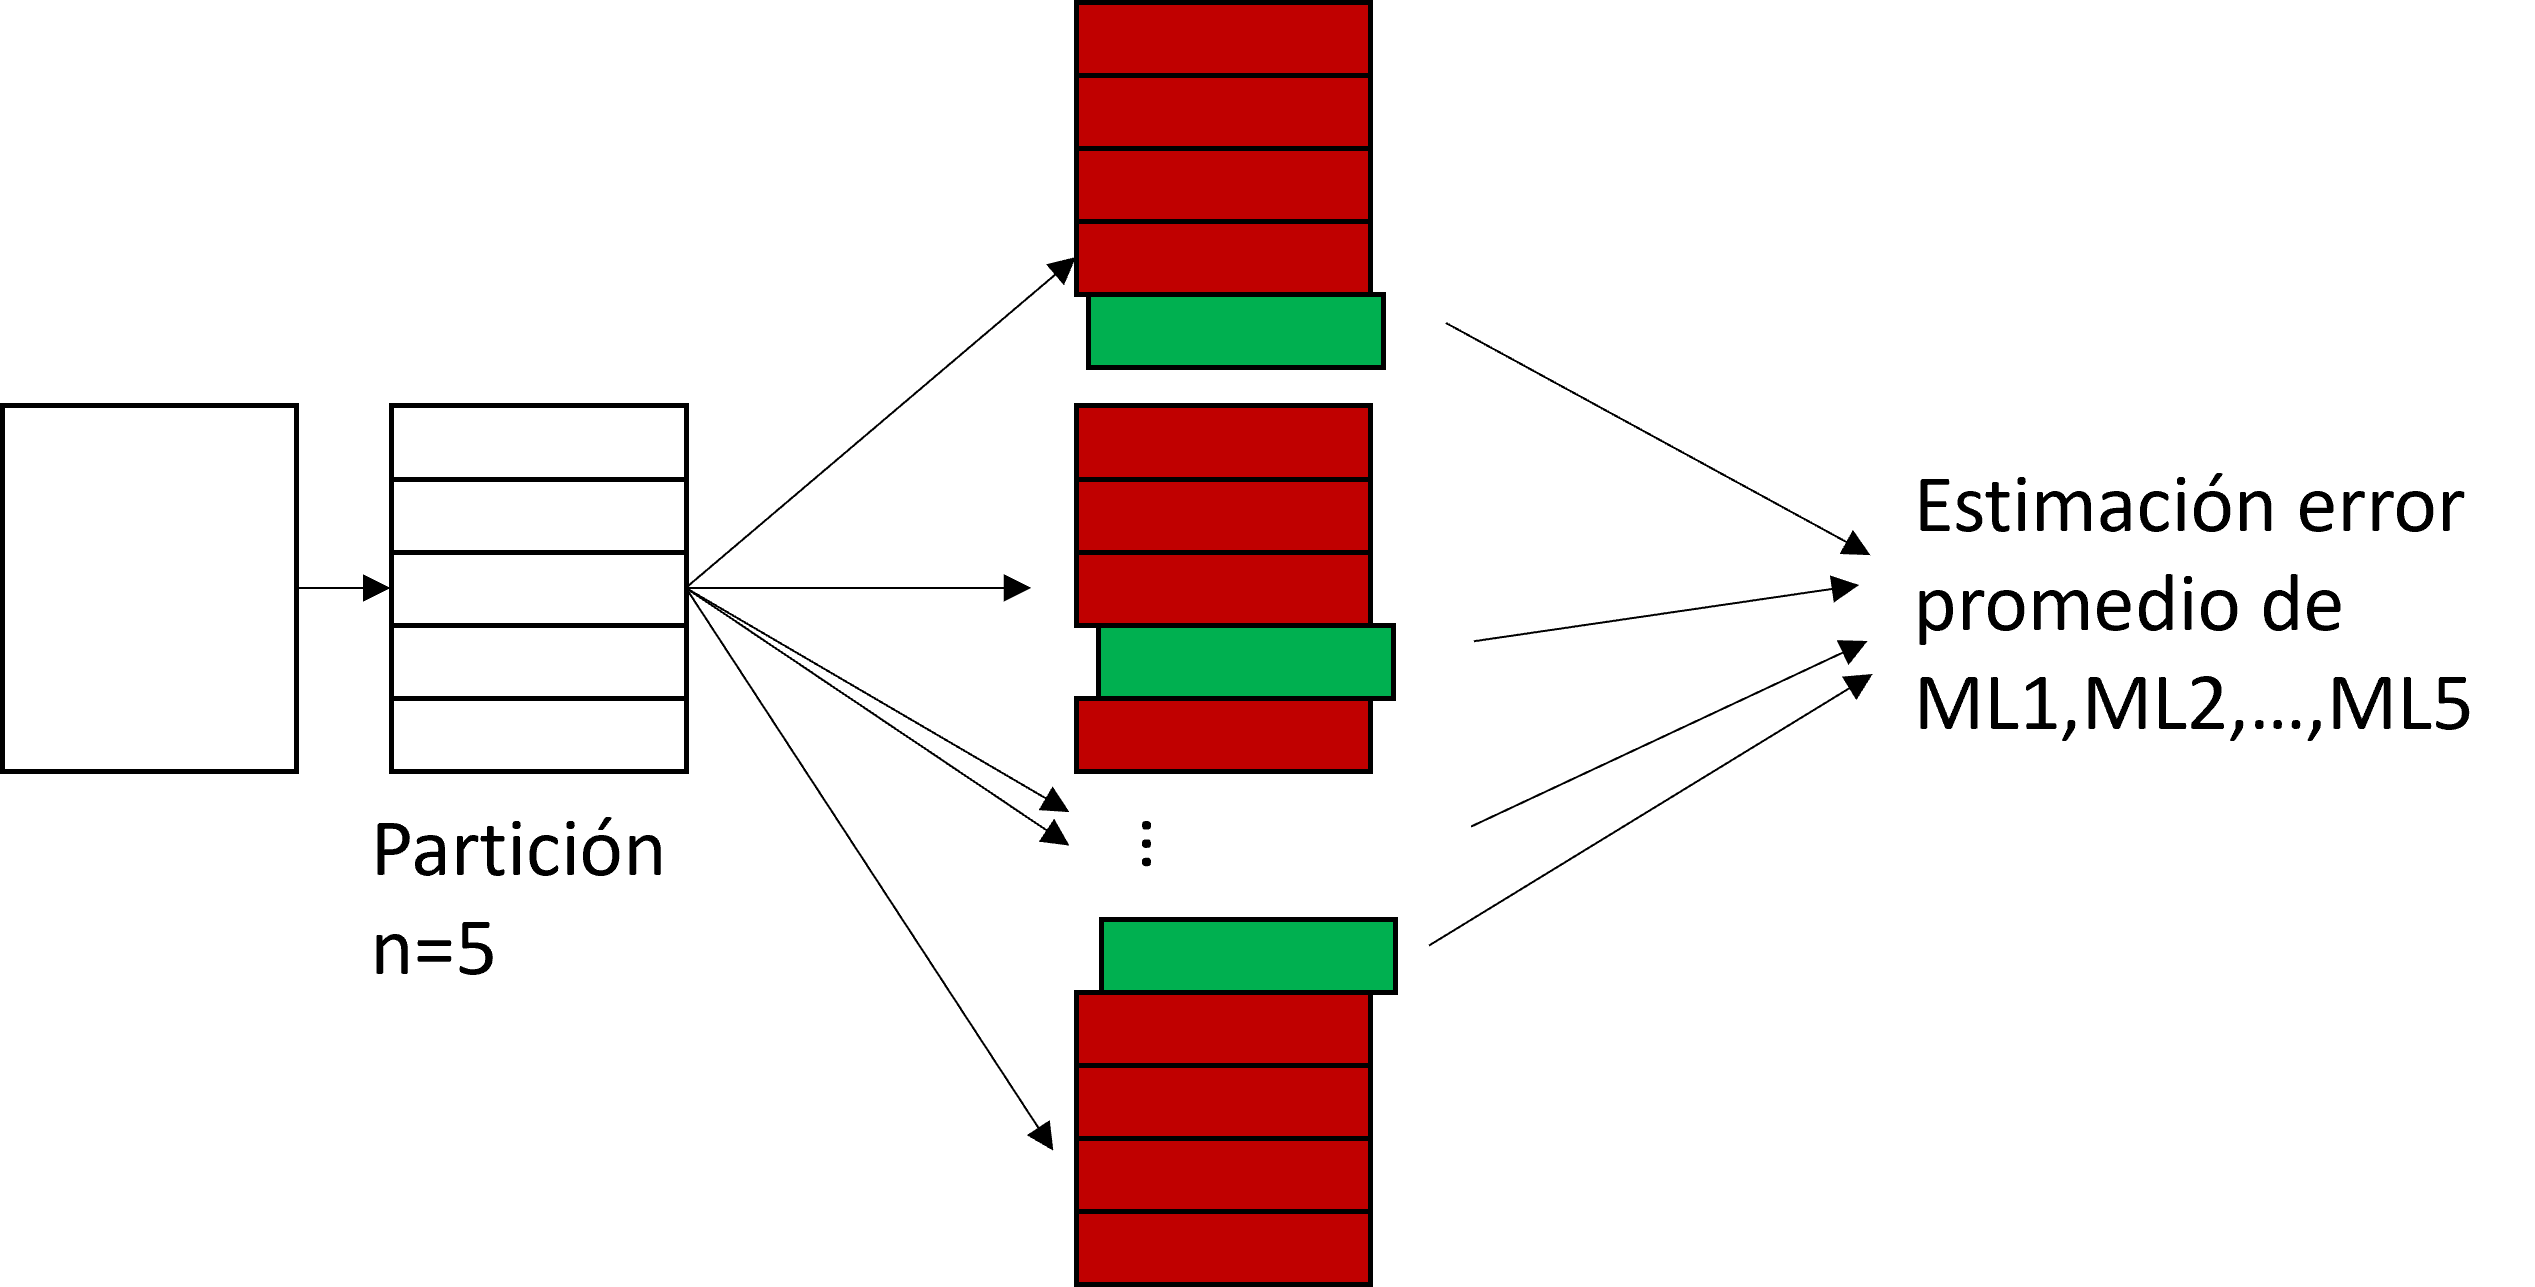


En la siguiente celda se muestra el código para aplicar la función de validación cruzada *cross_val_score()*. Es importante indicar que esta función en *Scikit-learn* utiliza una función de utilidad, no una función de error, para medir el rendimiento de la técnica: en el caso de clasificación emplearemos la "accuracy" o exactitud.

In [ ]:
# Importamos la clase cross_val_score para realizar la validación cruzada
from sklearn.model_selection import cross_val_score

# El número de subconjuntos (folds) y por tanto el número de veces que se ejecuta el entrenamiento
# El valor por defecto es 5
numero_subconjuntos = 5
# Como función de utilidad tomamos la exactitud total 
# (Las opciones disponibles se pueden consultar 
# en https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
funcion_utilidad = "accuracy"

# El modelo es el clasificador lineal entreado con SGD
# EL conjunto de datos de entrada que se a dividir en diferentes subconjuntos (folds)
# La función cross_val_score devuelve un nd-array de numpy en el que cada elemento es el acierto de 
# en el conjunto de test
# Se emplean todos los datos x e y
acierto = cross_val_score(clasificador_sgd, x, y,
                         scoring=funcion_utilidad, cv=numero_subconjuntos)

# Mostramos los resultados
print("El acierto de cada subconjunto es:")
print(acierto)
# Media
print("La media del acierto es:")
print(round(acierto.mean(),3))
# Desviación estándard 
print("La desviación estándar del acierto es:")
print(round(acierto.std(),3))

El acierto de cada subconjunto es:
[0.99  0.99  0.995 0.98  0.98 ]
La media del acierto es:
0.987
La desviación estándar del acierto es:
0.006


**Estimación del mejor conjunto de hiperparámetros**

Hasta el momento en el problema de clasificación hemos utilizado una configuración fija de las técnicas de machine learning para evaluar su rendimiento. Ahora bien, dicha configuración puede ser cambiada de modo que unas configuraciones pueden ofrecer un mejor rendimiento que otras. Por ejemplo, en el caso de "Random forest" se puede elegir el número de árboles de decisión que se van a probar para elegir el mejor número.
  

Para estimar el mejor conjunto de hiperparámetros y comprobar la capacidad de generalización de la mejor configuración hay que dividir el conjunto de datos en tres conjuntos: entrenamiento, validación y test. Los dos primeros sirven para seleccionar la mejor configuración y el último, como siempre, sirve para comprobar la capacidad de generalización. Se puede aplicar la técnica de validación cruzada sobre los datos no empleados para el test o prueba final, especialmente si no se disponen de muestras suficientes para obtener los tres conjuntos.

Este proceso puede ser tedioso si se realiza a mano. Se puede realizar mediante un bucle iterativo, no obstante, la bilioteca *Scikit-learn* posee una clase llamada *GridSearchCV()* que realiza las operaciones necesarias:

<ul>
<li>Para una serie de valores de los hiperparámetros de la técnica de machine learning crea todas las posibles combinaciones.</li>

<li>Para cada combinación entrena y valida la técnica empleada mediante validación cruzada. El número de subconjuntos o <i>folds</i> es un parámetro de la *GridSearchCV*.</li>

<li>Devuelve los resultados de error de validación de todas las combinaciones.</li>

</ul>

Así, vamos a estimar la precisión para "Random forest" 50, 75, 100, 125 y 150 árboles de decisión. Además el valor de máxima profundidad de cada árbol podrá valer 2, 3 y 4, este parámetro se denomina *max_depth*. Así, el número total de combinaciones será 5x3 = 15

Vamos a tomar número de subconjuntos o *folds* igual a 5 como en el ejemplo de validación cruzada. 


In [ ]:
# Importamons la biblioteca para generar todas las combinaciones de parámetros de entrenamiento
from sklearn.model_selection import GridSearchCV

# Los valores de los hiperparámetros se guardan en un diccionario o en una lista de diccionarios
rejilla_hiperparametros = [
{'n_estimators': [50, 75, 100, 125, 150], 'max_depth': [2, 3, 4]},
]

# Número de subconjuntos o folds para la validación cruzada
numero_subconjuntos = 5
# Función utilidad
funcion_utilidad = "accuracy"
# El modelo a evaluar es un perceptrón multicapa
modelo_evaluar = RandomForestClassifier()

# Se crean todas las configuraciones del perceptrón multicapa
grid_search = GridSearchCV(modelo_evaluar, rejilla_hiperparametros, cv=numero_subconjuntos,
                           scoring=funcion_utilidad, return_train_score=True)

# Ahora el conjunto de datos de entrenamiento es empleado con grid_search 
# y el conjunto de test se empleará posteriormente una vez seleccionada la mejor configuración

# Conjuntos de entrenamiento y test
x_ent, x_test, y_ent, y_test  = train_test_split(x, y, test_size=0.2)

# Entrenamiento y validación de todas las configuraciones
grid_search.fit(x_ent, y_ent)

# GridSearchCV devuelve un diccionario
resultados = grid_search.cv_results_
# Transformamos en un DataFrame para visualizar de forma más sencilla los resultados
resultados_dataframe = pd.DataFrame.from_dict(resultados)
# La mejor configuración es:
print(resultados_dataframe)


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.067819      0.007201         0.004251        0.001102   
1        0.168435      0.008704         0.006734        0.002121   
2        0.250003      0.074861         0.010258        0.002324   
3        0.280525      0.048029         0.009604        0.003964   
4        0.354891      0.014869         0.012615        0.004006   
5        0.130095      0.030758         0.005423        0.001814   
6        0.183839      0.047204         0.011327        0.005658   
7        0.182297      0.047514         0.007392        0.002472   
8        0.216459      0.049287         0.009640        0.005156   
9        0.274031      0.069302         0.010286        0.003256   
10       0.094435      0.041870         0.004486        0.001362   
11       0.242355      0.034451         0.008009        0.002685   
12       0.260670      0.037032         0.009522        0.002838   
13       0.320907      0.073977         0.010896

El siguiente código muestra cómo obtener la media y la desviación estándar de cada configuración así como el mejor resultado (puede haber un empate entre varias configuraciones).

In [ ]:
# La media y la desviación estándar son:
print("La media de los resultados es:")
print(resultados['mean_test_score'])
print("")
print("La desviación estándar de los resultados es:")
print(resultados['std_test_score'])
print("")
# La media del valor de la función de utilidad para la mejor configuración
print("El mejor resultado es:")
print(round(grid_search.best_score_,4))

La media de los resultados es:
[0.9875  0.9875  0.9875  0.9875  0.9875  0.9875  0.9875  0.9875  0.9875
 0.9875  0.98625 0.98625 0.98625 0.9875  0.9875 ]

La desviación estándar de los resultados es:
[0.00684653 0.00684653 0.00684653 0.00684653 0.00684653 0.00684653
 0.00684653 0.00684653 0.00684653 0.00684653 0.00829156 0.00829156
 0.00829156 0.00684653 0.00684653]

El mejor resultado es:
0.9875


La mejor configuración de entre las probadas se puede extraer directamente con los métodos *best_params_* y *best_estimator_*

In [ ]:
# Mejores parámetros de entre los probados
print('La mejor configuración es:')
print(grid_search.best_params_)

# La configuración con los mejores parámetros
grid_search.best_estimator_

La mejor configuración es:
{'max_depth': 2, 'n_estimators': 50}


RandomForestClassifier(max_depth=2, n_estimators=50)

## Problema de regresión. 



**Generación de datos**

Al igual que en clasificación vamos a generar datos de forma sintética.

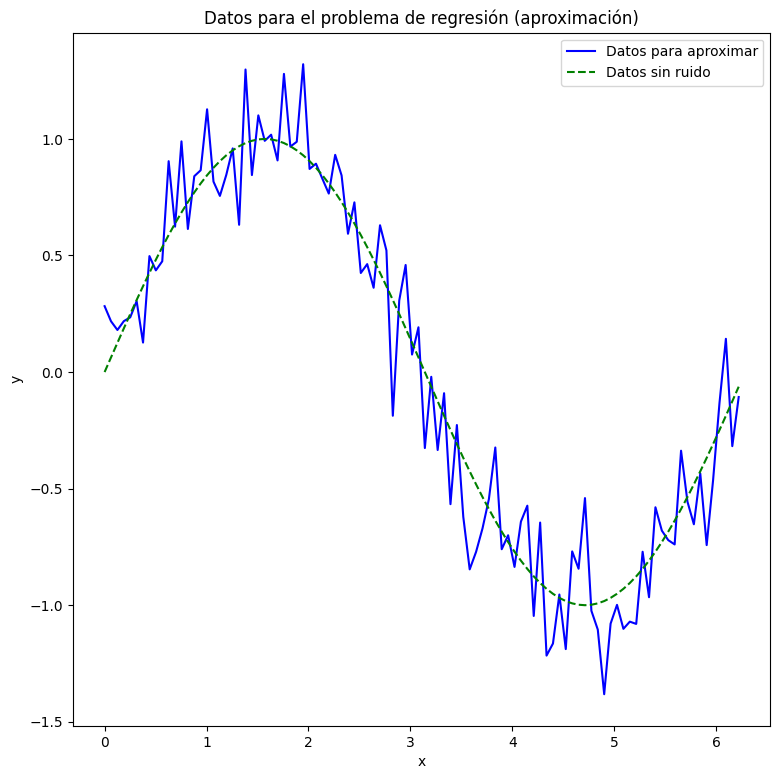

In [ ]:
# Función para generar datos para el problema de regresión
ini_x = 0
fin_x = 2*np.pi
num_puntos = 100
paso = (fin_x-ini_x)/num_puntos
x = np.arange(start=ini_x, stop=fin_x, step=paso)
x = x.reshape(-1,1)

# Función seno a la que añadimos ruido según una distribución normal:(gaussiana)
y_limpia = np.sin(x)
reduccion_ruido = 5
y = np.sin(x) + np.random.randn(num_puntos, 1)/reduccion_ruido

plt.figure(figsize=(9, 9))
plt.plot(x, y, "b-", label='Datos para aproximar')
plt.plot(x, y_limpia, "g--", label='Datos sin ruido')
plt.title('Datos para el problema de regresión (aproximación)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

**Aproximador polinómico: utilización de *Pipeline()***

Para generar un polinomio con *Scikit-learn* se deben realizar dos operaciones: elevar a la potencia deseada los datos y aplicar un regresor lineal. La aplicación de varias operaciones se puede realizar en un mismo proceso mediante la clase *Pipeline()*. A continuación creamos un "canal de operaciones" o "pipeline" para generar un polinomio de grado 3, generamos los conjuntos de entrenamiento y de test y obtenemos los resultados de la aproximación.

In [ ]:
# Importamos la clase para aplicar un ajuste lineal a los datos
from sklearn.linear_model import LinearRegression

# Importamos la clase para generar el polinomio
from sklearn.preprocessing import PolynomialFeatures

# Importamos la clase Pipeline 
from sklearn.pipeline import Pipeline

# Instanciamos la clase que eleva a la potencia deseada
poly = PolynomialFeatures(degree=3)

# Instanciamos el aproximador lineal
aproximador_lineal = LinearRegression()

# Generamos el pipeline: aplicará los procedimientos en el orden que indiquemos
pipeline = Pipeline([('elevar_a_potencias', poly), ('regresor_lineal', aproximador_lineal)])

# Seleccionamos un 80% de los datos para entrenamiento y un 20% para test
x_ent, x_test, y_ent, y_test  = train_test_split(x, y, test_size=0.2)

# Generamos los parámetros del modelo
pipeline.fit(x_ent, y_ent)

# Obtenemos las predicciones para los conjuntos de entrenamiento y test
y_sal_ent = pipeline.predict(x_ent)
y_sal_test = pipeline.predict(x_test)


**Ejercicio 12: resultados del polinomio de grado 3**

Ejecute varias veces la generación de conjuntos de entrenamiento y test y la obtención del polinomio de grado 3, obtenga en cada ocasión las métricas de error de entrenamiento y test y dibuje los resultados.

¿Cambia la precisión del modelo?

**Ejercicio 13: Validación cruzada en el problema de regresión**

Como hemos visto en el problema de clasificación puede ser conveniente utilizar la validación cruzada para estimar de forma más precisa el rendimiento de la técnica de machine learning. Aplique validación cruzada en el problema de regresión, utilice 5 subconjuntos.

En el parámetro *estimator* de *cross_val_score()* utilice la instancia creada *pipeline*. De este modo, en cada iteración del algoritmo de validación cruzada se podrá crear y calcular los parámetros del polinomio de grado 3. Como *cross_val_score()* requiere una función de utilidad, es decir, una función que tiene un valor mayor a mejor rendimiento de la técnica, emplearemos el valor negativo del error cuadrático medio: 'neg_mean_squared_error'.

Compruebe que los valores son acordes a los valores obtenidos en el ejercicio anterior.

**Ejercicio 14: estimación de los mejores hiperparámetros con *GridSearchCV()***

Finalmente, vamos a obtener el mejor polinomio de un conjunto de polinomios mediante la clase *GridSearchCV()*.

El número de subconjuntos será 5.

Utilice la instancia *pipeline* creada para generar el polinomio: ahora no se puede indicar en *pipeline* el grado del polinomio, ya que es un hiperparámetro que varía. Por ello, en *'elevar_a_potencias'* escribiremos simplemente *'PolynomialFeatures()'*. Además, para escibir la rejilla de hiperparámetros deberemos escribir: 'elevar_a_potencias__degree': e introducir los valores deseados.

Utilice 'neg_mean_squared_error' como función de utilidad.

El grado del polinomio variará desde 1 hasta 30.

Una vez finalizado el proceso, obtenga el mejor polinomio: ¿el resultado coincide con el obtenido en el último ejercicio de la primera sesión?

